
# Project: Investigate a Dataset - No-show appointments

## Table of Contents 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 

### Dataset Description  

The dataset I chose is No-show appointments. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
* PatientId - Identification of a patient 
* AppointmentID - Identification of each appointment
* Gender - Male or Female
* ScheduledDay - The day the patient set up their appointment
* AppointmentDay - The day of the medical appointment
* Age - Patient's age
* Neighbourhood - Location of the hospital
* Scholarship - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
* Hipertension - Whether patient has hypertension or not
* Diabetes - Whether patient has diabetes or not
* Alcoholism - Whether patient is an alcoholic or not
* Handcap - Whether patient is an handicap or not
* SMS_received - Whether patient received one or more text message or none
* No-show - Whether patient shows up for appointment or not




### Question(s) for Analysis 
* Factors that likely contribute to patients not able to show up for appointments
* Does the interval between scheduled date and appointment date likely to affect patients from showing up for appointments
* Which day(s) of the week does patient skip appointment most


In [5]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling               



### General Properties                                


In [7]:
#load data
df = pd.read_csv('no-show-appointments.csv')

In [8]:
#check number of rows and columns
df.shape

(110527, 14)

In [9]:
#check for missing values, inappropriate datatype and column names
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 110527 entries, 0 to 110526

Data columns (total 14 columns):

 #   Column          Non-Null Count   Dtype  

---  ------          --------------   -----  

 0   PatientId       110527 non-null  float64

 1   AppointmentID   110527 non-null  int64  

 2   Gender          110527 non-null  object 

 3   ScheduledDay    110527 non-null  object 

 4   AppointmentDay  110527 non-null  object 

 5   Age             110527 non-null  int64  

 6   Neighbourhood   110527 non-null  object 

 7   Scholarship     110527 non-null  int64  

 8   Hipertension    110527 non-null  int64  

 9   Diabetes        110527 non-null  int64  

 10  Alcoholism      110527 non-null  int64  

 11  Handcap         110527 non-null  int64  

 12  SMS_received    110527 non-null  int64  

 13  No-show         110527 non-null  object 

dtypes: float64(1), int64(8), object(5)

memory usage: 11.8+ MB


In [10]:
#check for duplicates
sum(df.duplicated())

0

In [11]:
#print first-five entry to inspect the structure of the data deeply
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning    

 

The result of the previous code cells show that the data has `110527 rows and 14 columns`, no `missing values` and `no duplicates`.
In order to ease my analysis, I will make the modifications below to the data
* Change all column names to lower case
* patientId to patient_id and appointmentID to appointment_id
* scheduledDay to scheduled_day and appointmentDay to appointment_day
* hipertension to hypertension
* handcap to handicap

To make the column name clearer and direct, I will:
* change the name of `no-show` column to `miss_appointment`
* Change the values of `miss_appointment` column to complete lower case

I will change the data type of `scheduled_day` and `appointment_day` to datetime

In [12]:
#change all column names to lower case                     
df.columns = df.columns.str.lower()

In [13]:
#rename some columns                    
df.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day','hipertension':'hypertension','handcap':'handicap'},inplace=True)

In [14]:
#change the name of `no-show` column to `miss_appointment` 
df.rename(columns={'no-show':'miss_appointment'},inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#change the values in miss_appointment to lower case
df['miss_appointment'] = df['miss_appointment'].str.lower()
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,no
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,no
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,no
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,no


In [16]:
#change the data type to date
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,no
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,no
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,no
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,no


<a id='eda'></a>
## Exploratory Data Analysis


### Factors that likely contribute to patients not able to show up for appointments

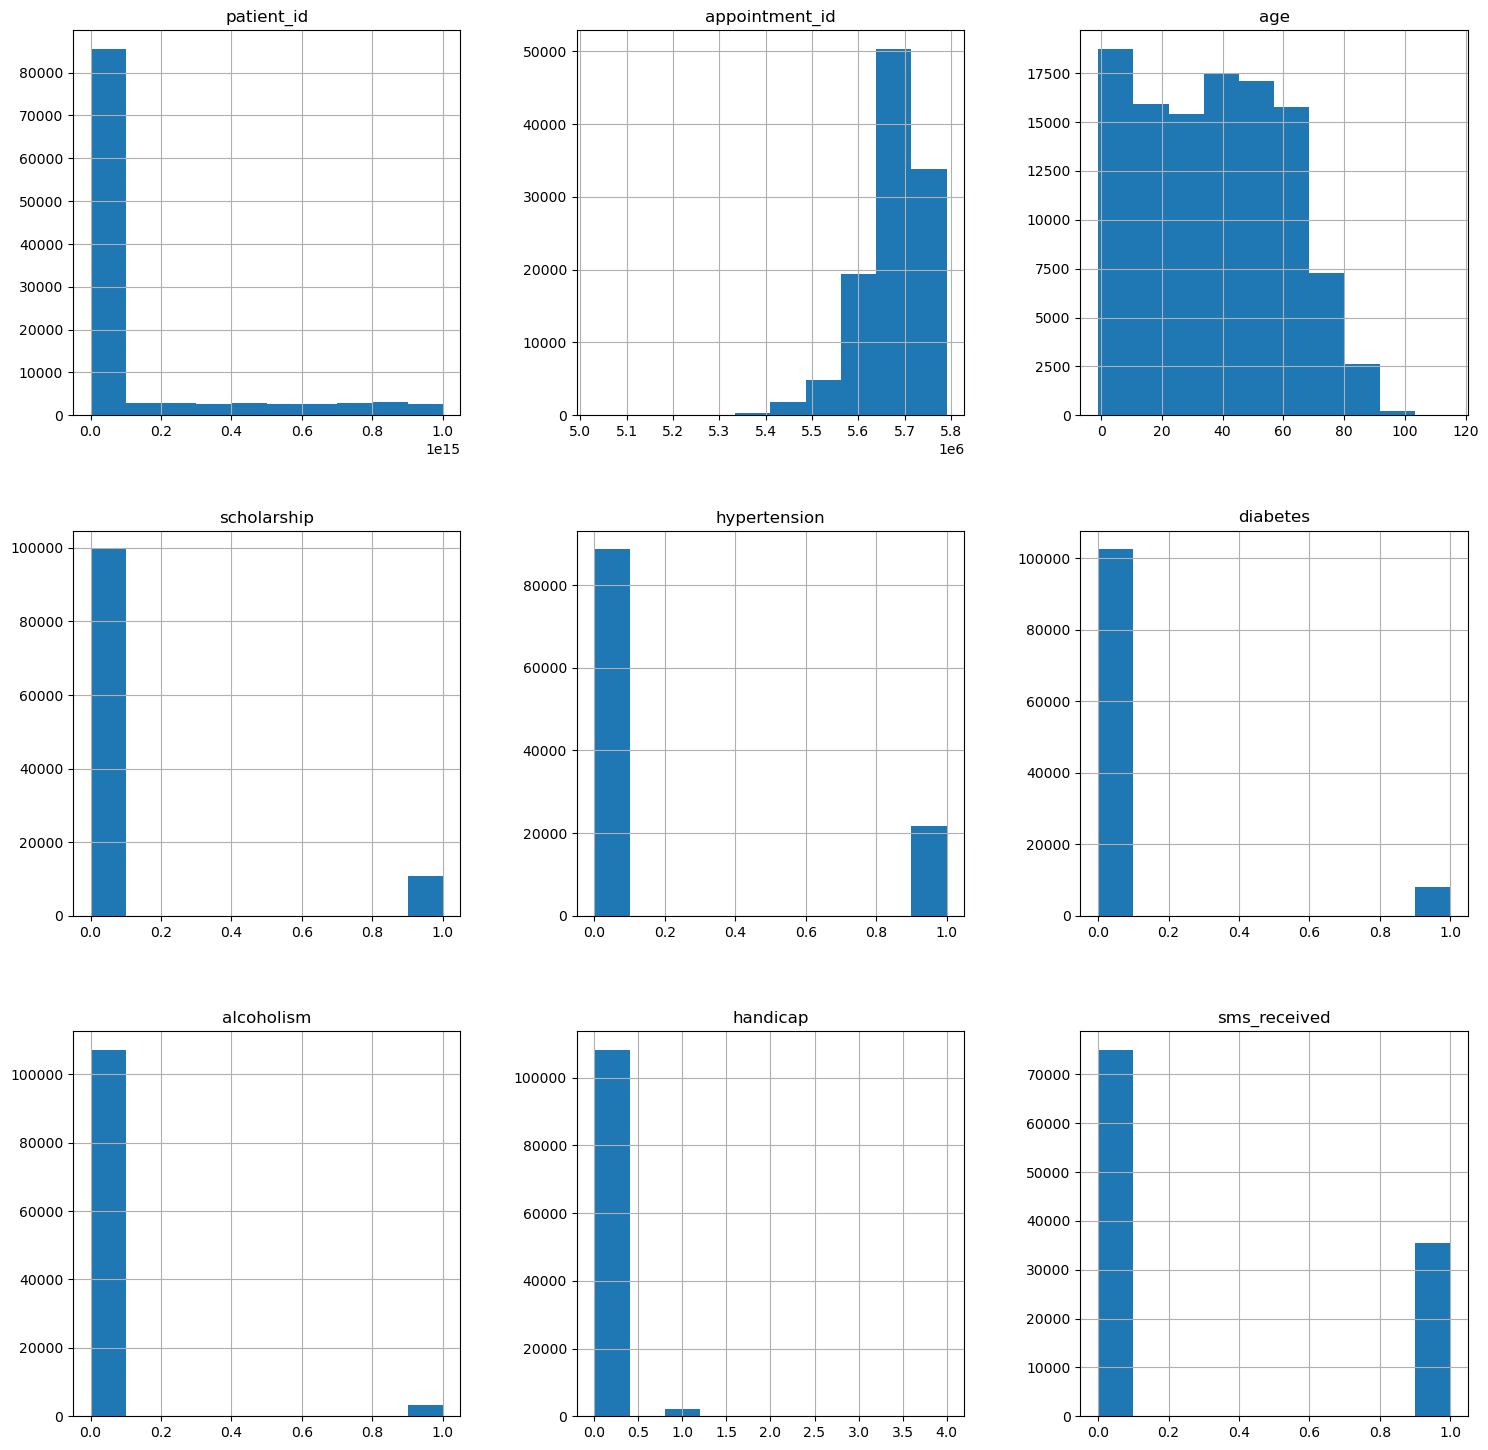

In [25]:
#explore the distribution of the numerical variables
df.hist(figsize=(18,18));

The graph plotted above show the distribution of the numerical variables in our dataset. As seen above, none of the variables is in a normal distribution; we have the age skewed to the left and the health conditions variable not continous due to the fact that we have only two values (1 & 0)

In [26]:
#group the dataset by miss_appointmnt
df.groupby(by='miss_appointment').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
miss_appointment,,,,,,,,,,,,,
no,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [ ]:
#group the dataset by miss_appointmnt
#find and plot the percentage of those who show up and those that does not
miss_appointment_stats = df.groupby(by='miss_appointment',as_index=False).count()
plt.pie(miss_appointment_stats['patient_id'],autopct='%0.1f%%');
plt.legend(['Show Up','No Show']);
plt.title('Show Up and No Show Percentage');

In [28]:
#divide the dataset into two: one containing those who show up and another one
#that contains does that miss the appointment
df_present = df.query('miss_appointment == "no"')
df_absent = df.query('miss_appointment == "yes"')

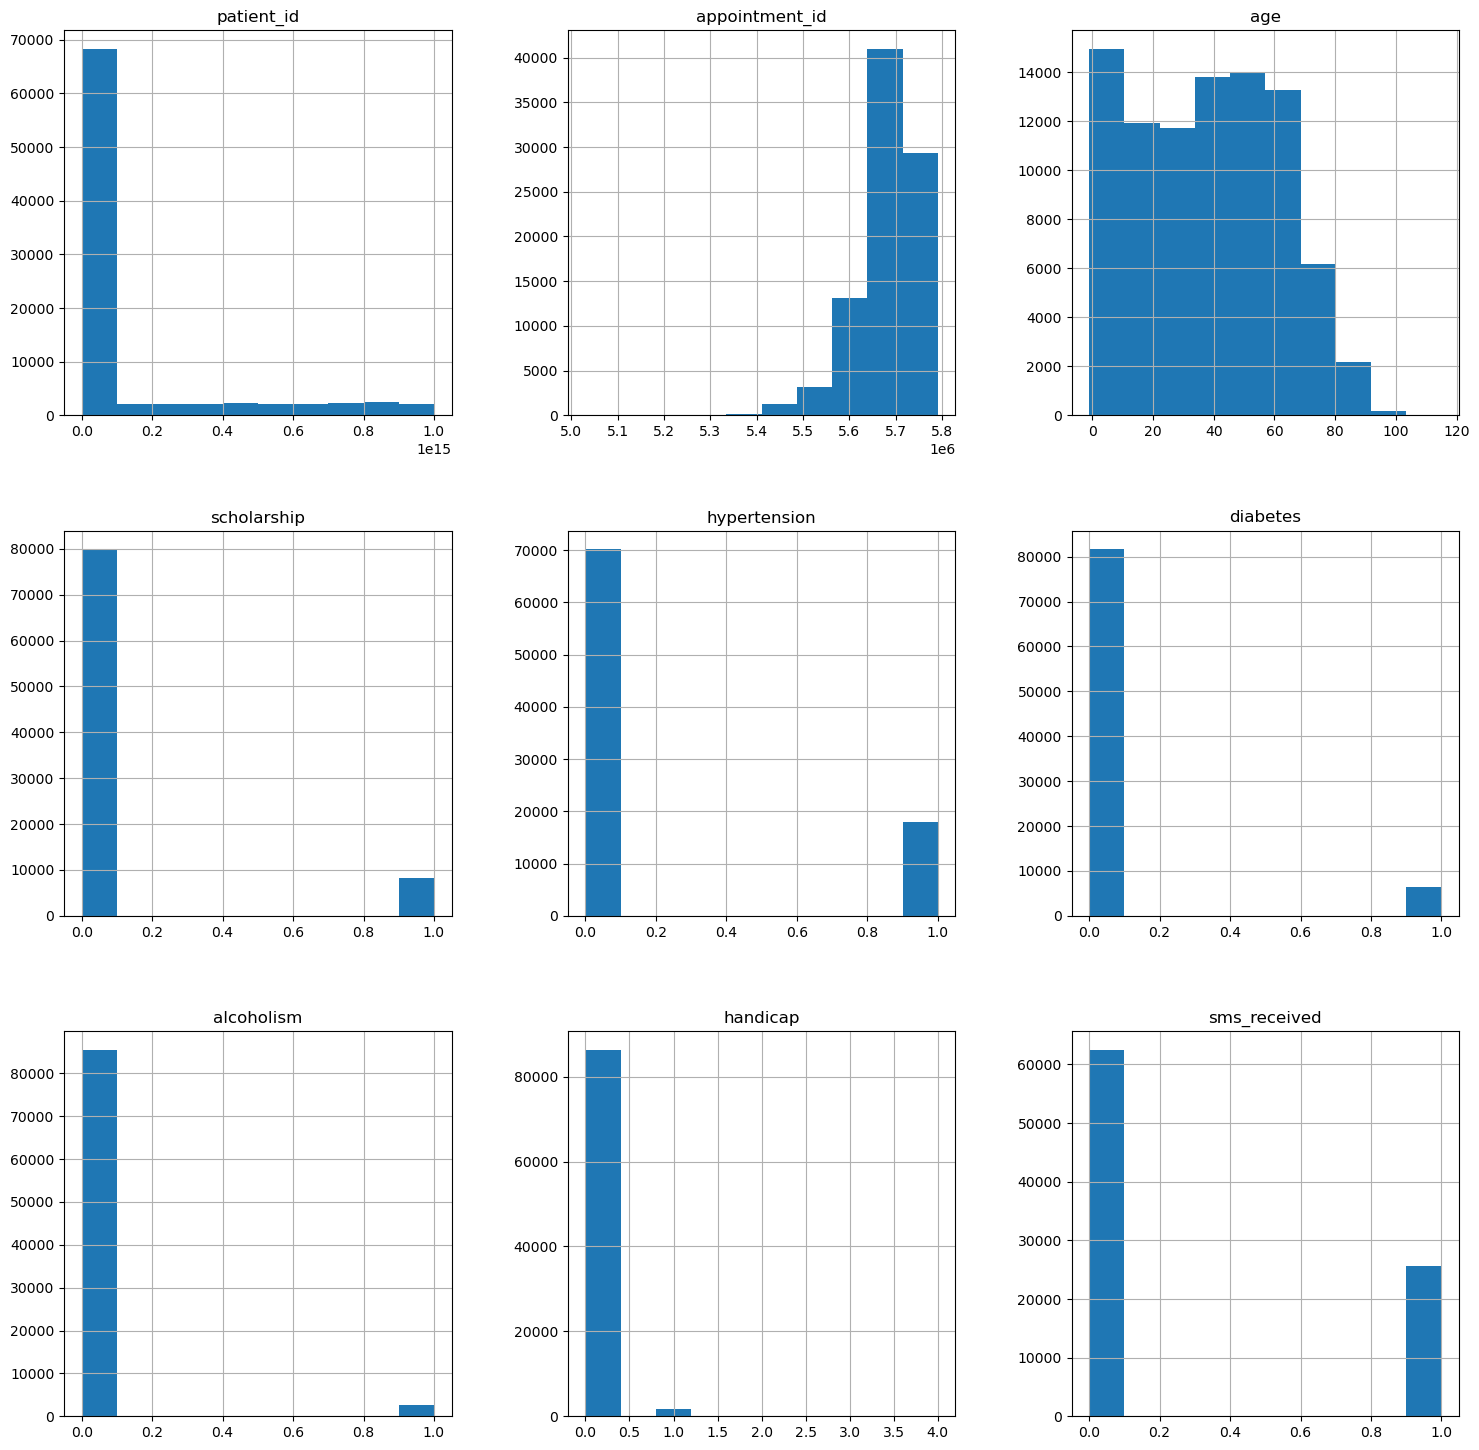

In [31]:
#view the distribution of the numerical variables in df_present
df_present.hist(figsize=(18,18));

The graph plotted above show the distribution of the numerical variables in patients that show up for appointment. As seen above, none of the variables is in a normal distribution; we have the age skewed to the left and the health conditions variable not continous due to the fact that we have only two values (1 & 0)

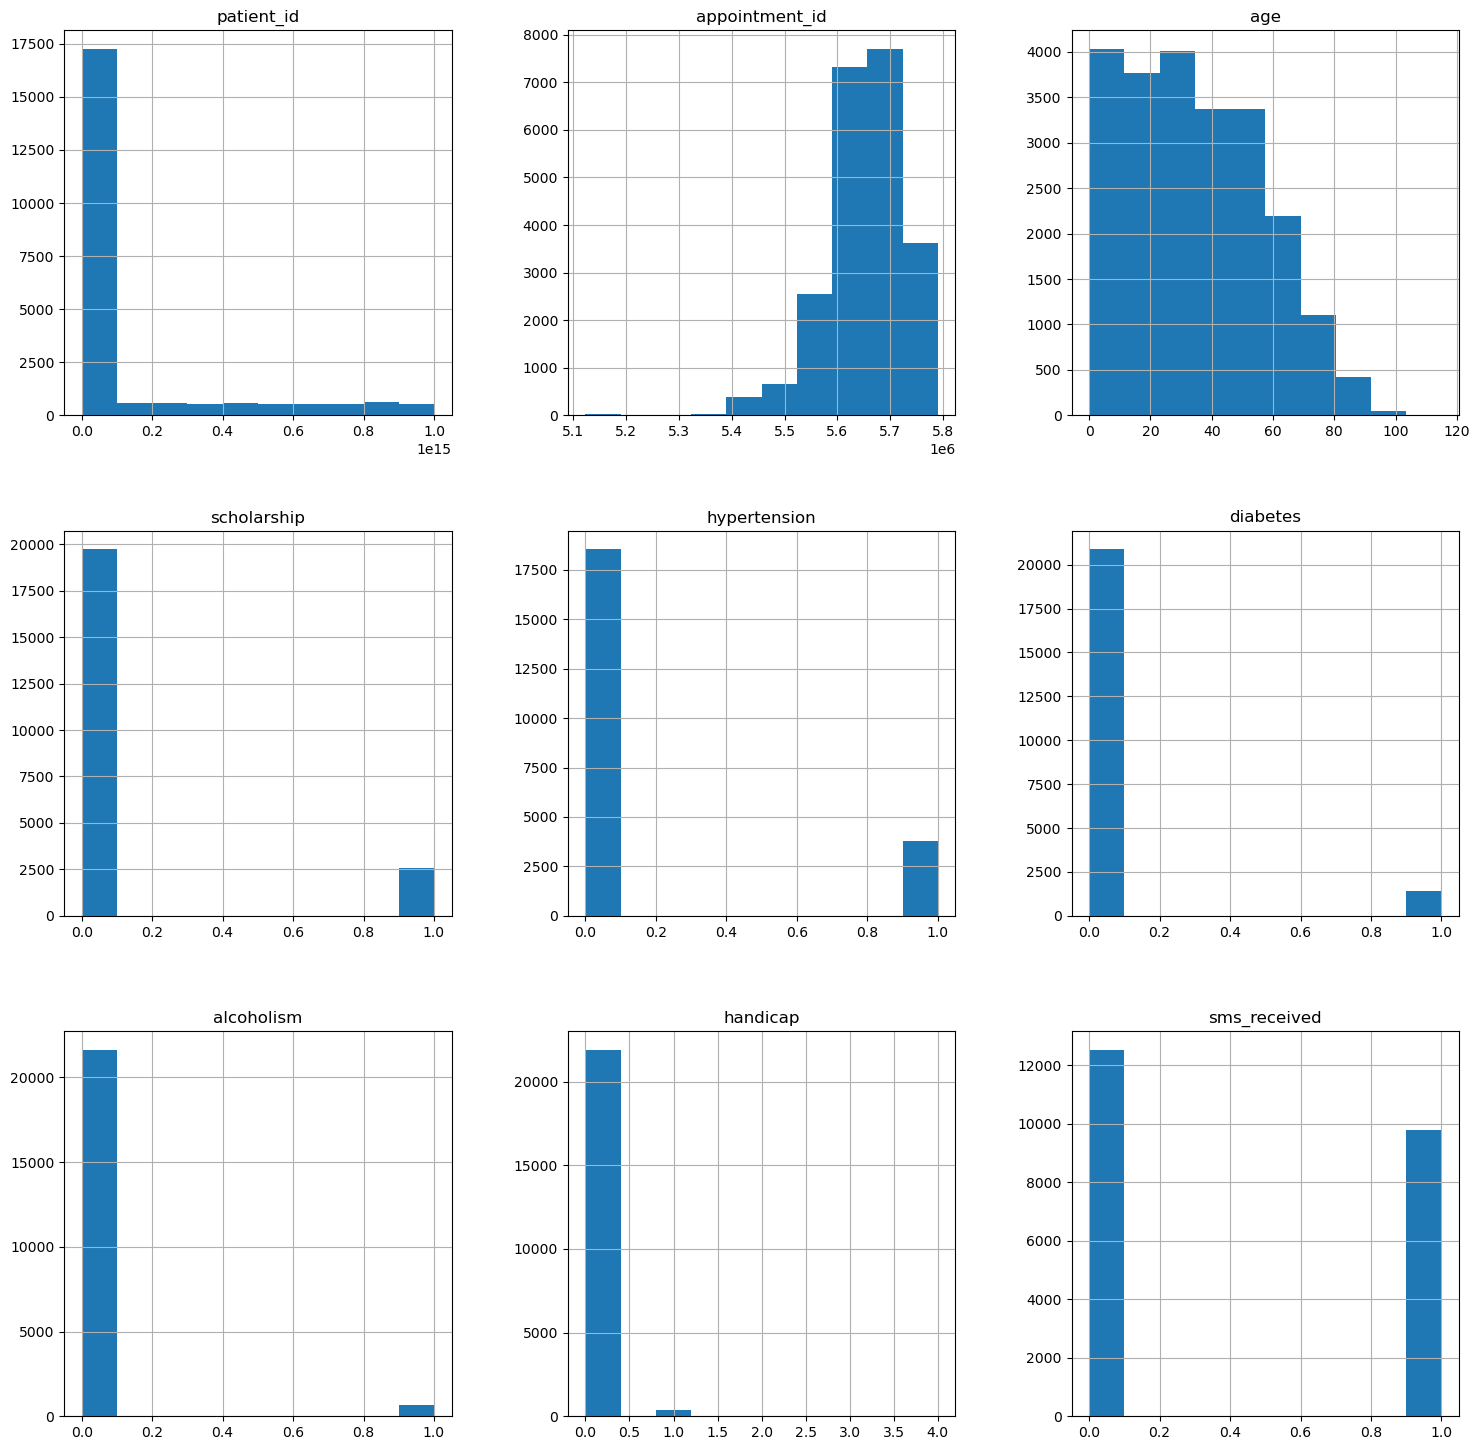

In [32]:
#view the distribution of the numerical variables in df_absent
df_absent.hist(figsize=(18,18));

The graph plotted above show the distribution of the numerical variables in patients that do not show up for appointment. As seen above, none of the variables is in a normal distribution; we have the age skewed to the left and the health conditions variable not continous due to the fact that we have only two values (1 & 0)

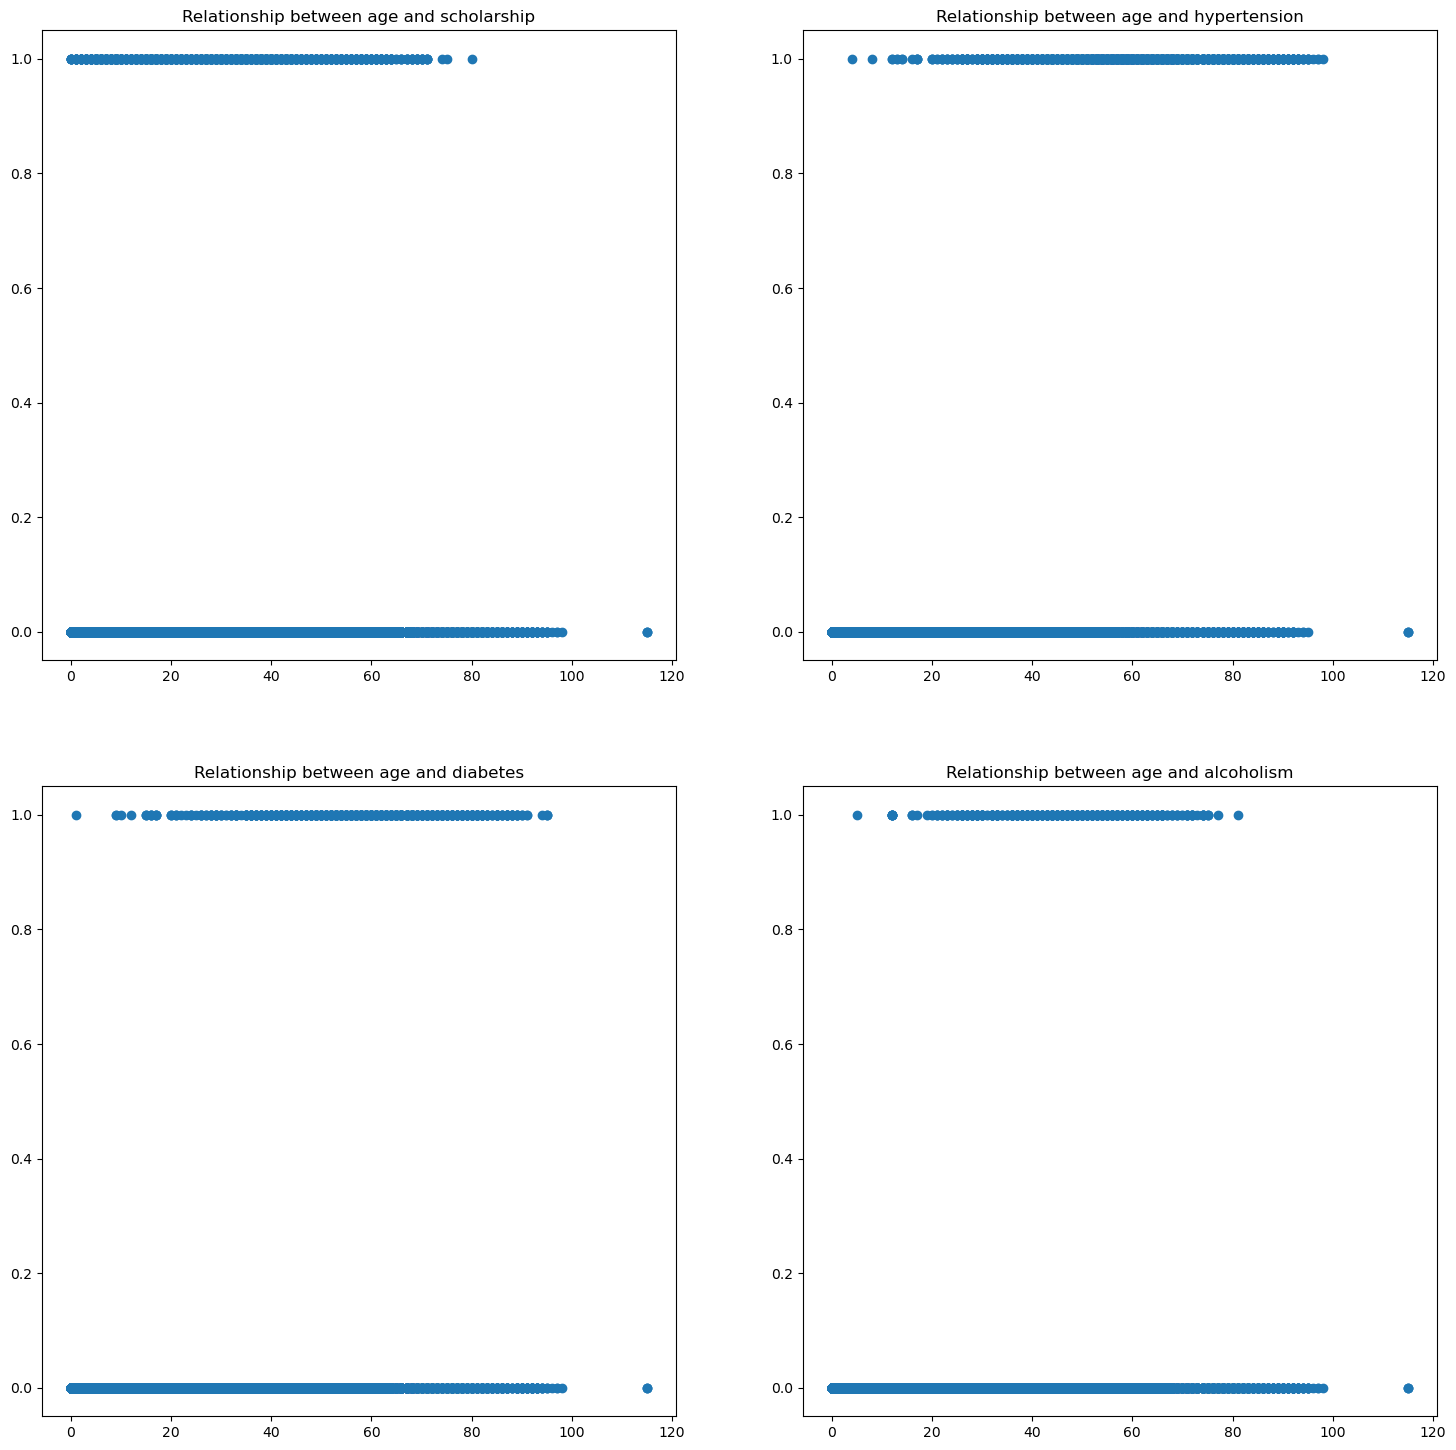

In [61]:
#plot a scatterplot for age against other variables in df_absent
figure, axis = plt.subplots(2, 2, figsize=(18,18))
axis[0, 0].scatter(x=df_absent['age'],y=df_absent['scholarship']);
axis[0,0].set_title('Relationship between age and scholarship');

axis[0, 1].scatter(x=df_absent['age'],y=df_absent['hypertension']);
axis[0,1].set_title('Relationship between age and hypertension');

axis[1, 0].scatter(x=df_absent['age'],y=df_absent['diabetes']);
axis[1,0].set_title('Relationship between age and diabetes');

axis[1, 1].scatter(x=df_absent['age'],y=df_absent['alcoholism']);
axis[1,1].set_title('Relationship between age and alcoholism');

The scatter plots made above shows the relationship between age and other health conditions in patients that miss appointments. The plots show that there are no relationship between age and other health conditions variable

In [33]:
#calculates the percentage for various attributes in the dataset for patients
#that miss the appointment,showing the distribution of those who have a 
#condition and those that do not
def calc_percent_absent(column):
    df_absent_yes = df_absent.query('{0} == 1'.format(column))
    df_absent_no = df_absent.query('{0} == 0'.format(column))
    df_absent_yes_percent = (df_absent_yes.shape[0] / df_absent.shape[0]) * 100
    df_absent_no_percent = (df_absent_no.shape[0] / df_absent.shape[0]) * 100
    return df_absent_yes_percent, df_absent_no_percent

In [34]:
#store the percentage of patients that have hypertension, diabetes,take alcohol
#and that are handicap in df_absent
df_absent_disease = []

In [35]:
#get the percentage of the patients that have hypertension
#and those that do not have in df_absent dataset
yes, no = calc_percent_absent('hypertension')
df_absent_disease.append(yes)
print('{}% has hypertension, {}% has no hypertension'.format(yes,no))

16.900398763385457% has hypertension, 83.09960123661455% has no hypertension


In [36]:
#get the percentage of the patients that have diabetes
#and those that do not have in df_absent dataset
yes, no = calc_percent_absent('diabetes')
df_absent_disease.append(yes)
print('{} has diabetes, {} has no diabetes'.format(yes,no))

6.407097092163627 has diabetes, 93.59290290783638 has no diabetes


In [37]:
#get the percentage of the patients that take alcohol
#and those that do not take in df_absent dataset
yes, no = calc_percent_absent('alcoholism')
df_absent_disease.append(yes)
print('{} take alcohol, {} do not take alcohol'.format(yes,no))

3.0332900219543886 take alcohol, 96.9667099780456 do not take alcohol


In [38]:
#get the percentage of the patients that are handicap
#and those that are not in df_absent dataset
yes, no = calc_percent_absent('handicap')
df_absent_disease.append(yes)
print('{} has handcap, {} has no handcap'.format(yes,no))

1.6398584165957255 has handcap, 98.17644159684573 has no handcap


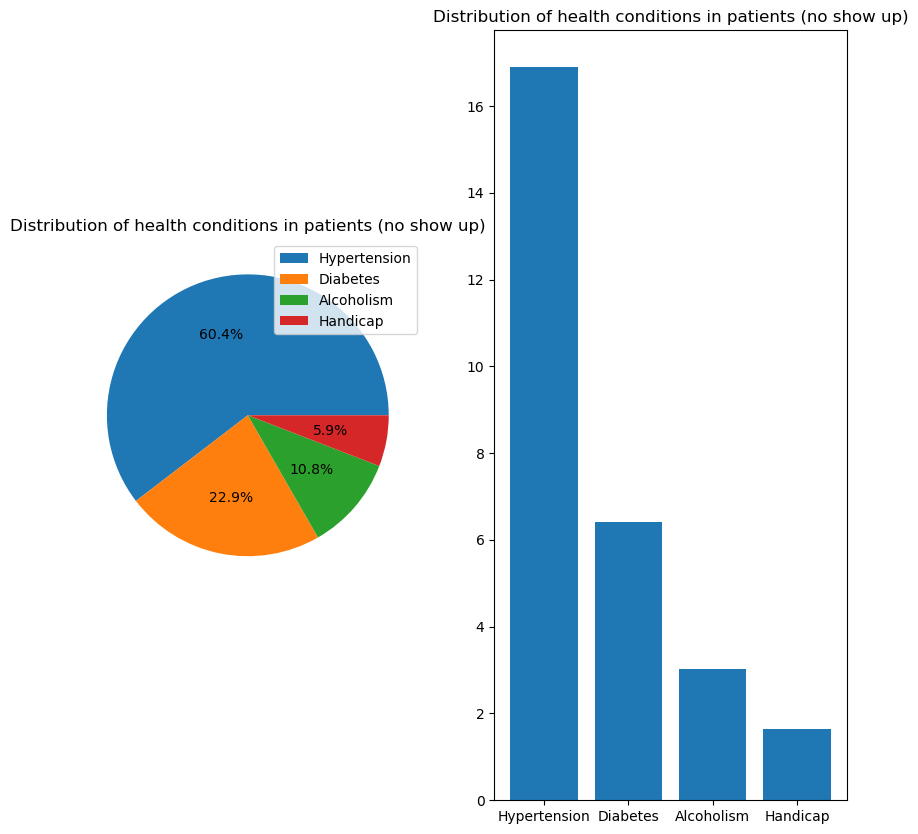

In [72]:
figure, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].pie(df_absent_disease,autopct='%0.1f%%');
axis[0].set_title('Distribution of health conditions in patients (no show up)');
axis[0].legend(['Hypertension','Diabetes','Alcoholism','Handicap']);

axis[1].bar(x=['Hypertension','Diabetes','Alcoholism','Handicap'], height = df_absent_disease);
axis[1].set_title('Distribution of health conditions in patients (no show up)');

The graphs above depict the proportion of each health conditions in patients that miss their appointments. It can be seen that we have a lot of patients that have hypertension and did not attend their appointments

The previous analysis tells us the percentage of patients that have hypertension, diabetes, take alcohol, are handicap in patients that miss their appointment. Now, we will analyze the percentage of patients that received sms and those that did not in patients that do not show up for appointment.

In [41]:
#get the percentage of the patients that receive SMS
#and those that do not in df_absent dataset
sms_received, no_sms_received  = calc_percent_absent('sms_received')
print('{} has sms_received, {} has no no_sms_received'.format(yes,no))

1.6398584165957255 has sms_received, 98.17644159684573 has no no_sms_received


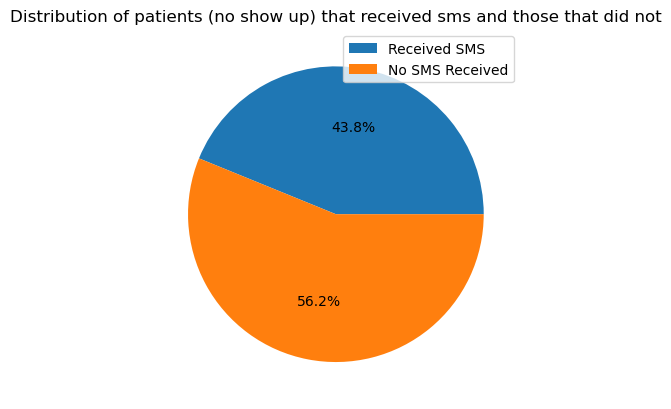

In [42]:
#plot a pie chart of patients that receive sms and those that do not in df_absent dataset
plt.pie([sms_received,no_sms_received],autopct='%0.1f%%');
plt.legend(['Received SMS','No SMS Received']);
plt.title('Distribution of patients (no show up) that received sms and those that did not');

The pie-chart above shows that 56.2% of patients that miss their appointments did not receive SMS

In the previous analysis, we analyzed the percentage of patients that received sms and those that did not in patients that missed appointment.. Now, we will analyze the percentage of patients that got scholarship and those that did not in patients that do not show up for appointment.

In [43]:
#get the percentage of the patients that receive scholarship
#and those that did not in df_absent dataset
received_scholarship, no_scholarship_received = calc_percent_absent('scholarship')
print('{} has received_scholarship, {} has no no_scholarship_received'.format(received_scholarship,no_scholarship_received))

11.55069671580268 has received_scholarship, 88.44930328419733 has no no_scholarship_received


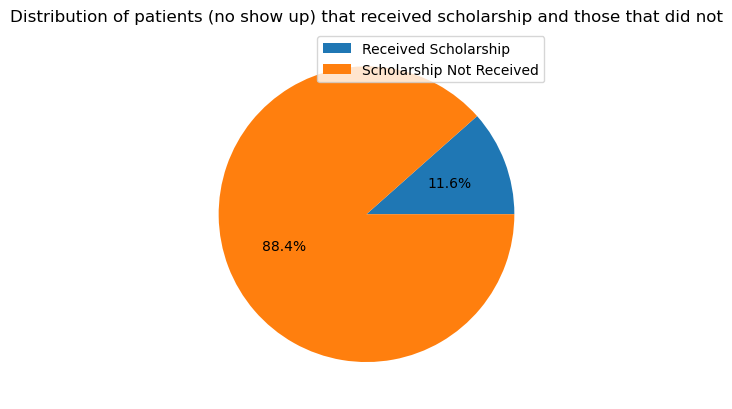

In [44]:
#draw a pie chart to show the distribution of patient that received scholarship and those that did not in df_absent dataset
plt.pie([received_scholarship,no_scholarship_received],autopct='%0.1f%%');
plt.legend(['Received Scholarship','Scholarship Not Received']);
plt.title('Distribution of patients (no show up) that received scholarship and those that did not');

The pie-chart above shows that 88.4% of patients that miss their appointments did not receive Scholarship

### Does the interval between scheduled date and appointment date likely to affect patients from showing up for appointments

In [74]:
#create a column `interval` that is the difference between the appointment date and the scheduled date
#in both df_present and df_absent data set
df_absent['interval'] = df_absent['appointment_day'] - df_absent['scheduled_day']
df_present['interval'] = df_present['appointment_day'] - df_present['scheduled_day']
df_present.head()

C:\Users\Naheem\AppData\Local\Temp\ipykernel_4816\2994740116.py:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_absent['interval'] = df_absent['appointment_day'] - df_absent['scheduled_day']

C:\Users\Naheem\AppData\Local\Temp\ipykernel_4816\2994740116.py:4: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_present['interval'] = df_present['appointment_day'] - df_present['scheduled_day']


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment,interval
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,no,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,no,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,no,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,no,0 days


In [75]:
#convert ``interval`` data type to int in df_present and df_absent dataset
df_absent['interval'] = df_absent['interval'].astype(str).apply(lambda x: x.split()[0]).astype(int)
df_present['interval'] = df_present['interval'].astype(str).apply(lambda x: x.split()[0]).astype(int)


C:\Users\Naheem\AppData\Local\Temp\ipykernel_4816\2257600244.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_absent['interval'] = df_absent['interval'].astype(str).apply(lambda x: x.split()[0]).astype(int)

C:\Users\Naheem\AppData\Local\Temp\ipykernel_4816\2257600244.py:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_present['interval'] = df_present['interval'].astype(str).apply(lambda x: x.split()[0]).astype(int)


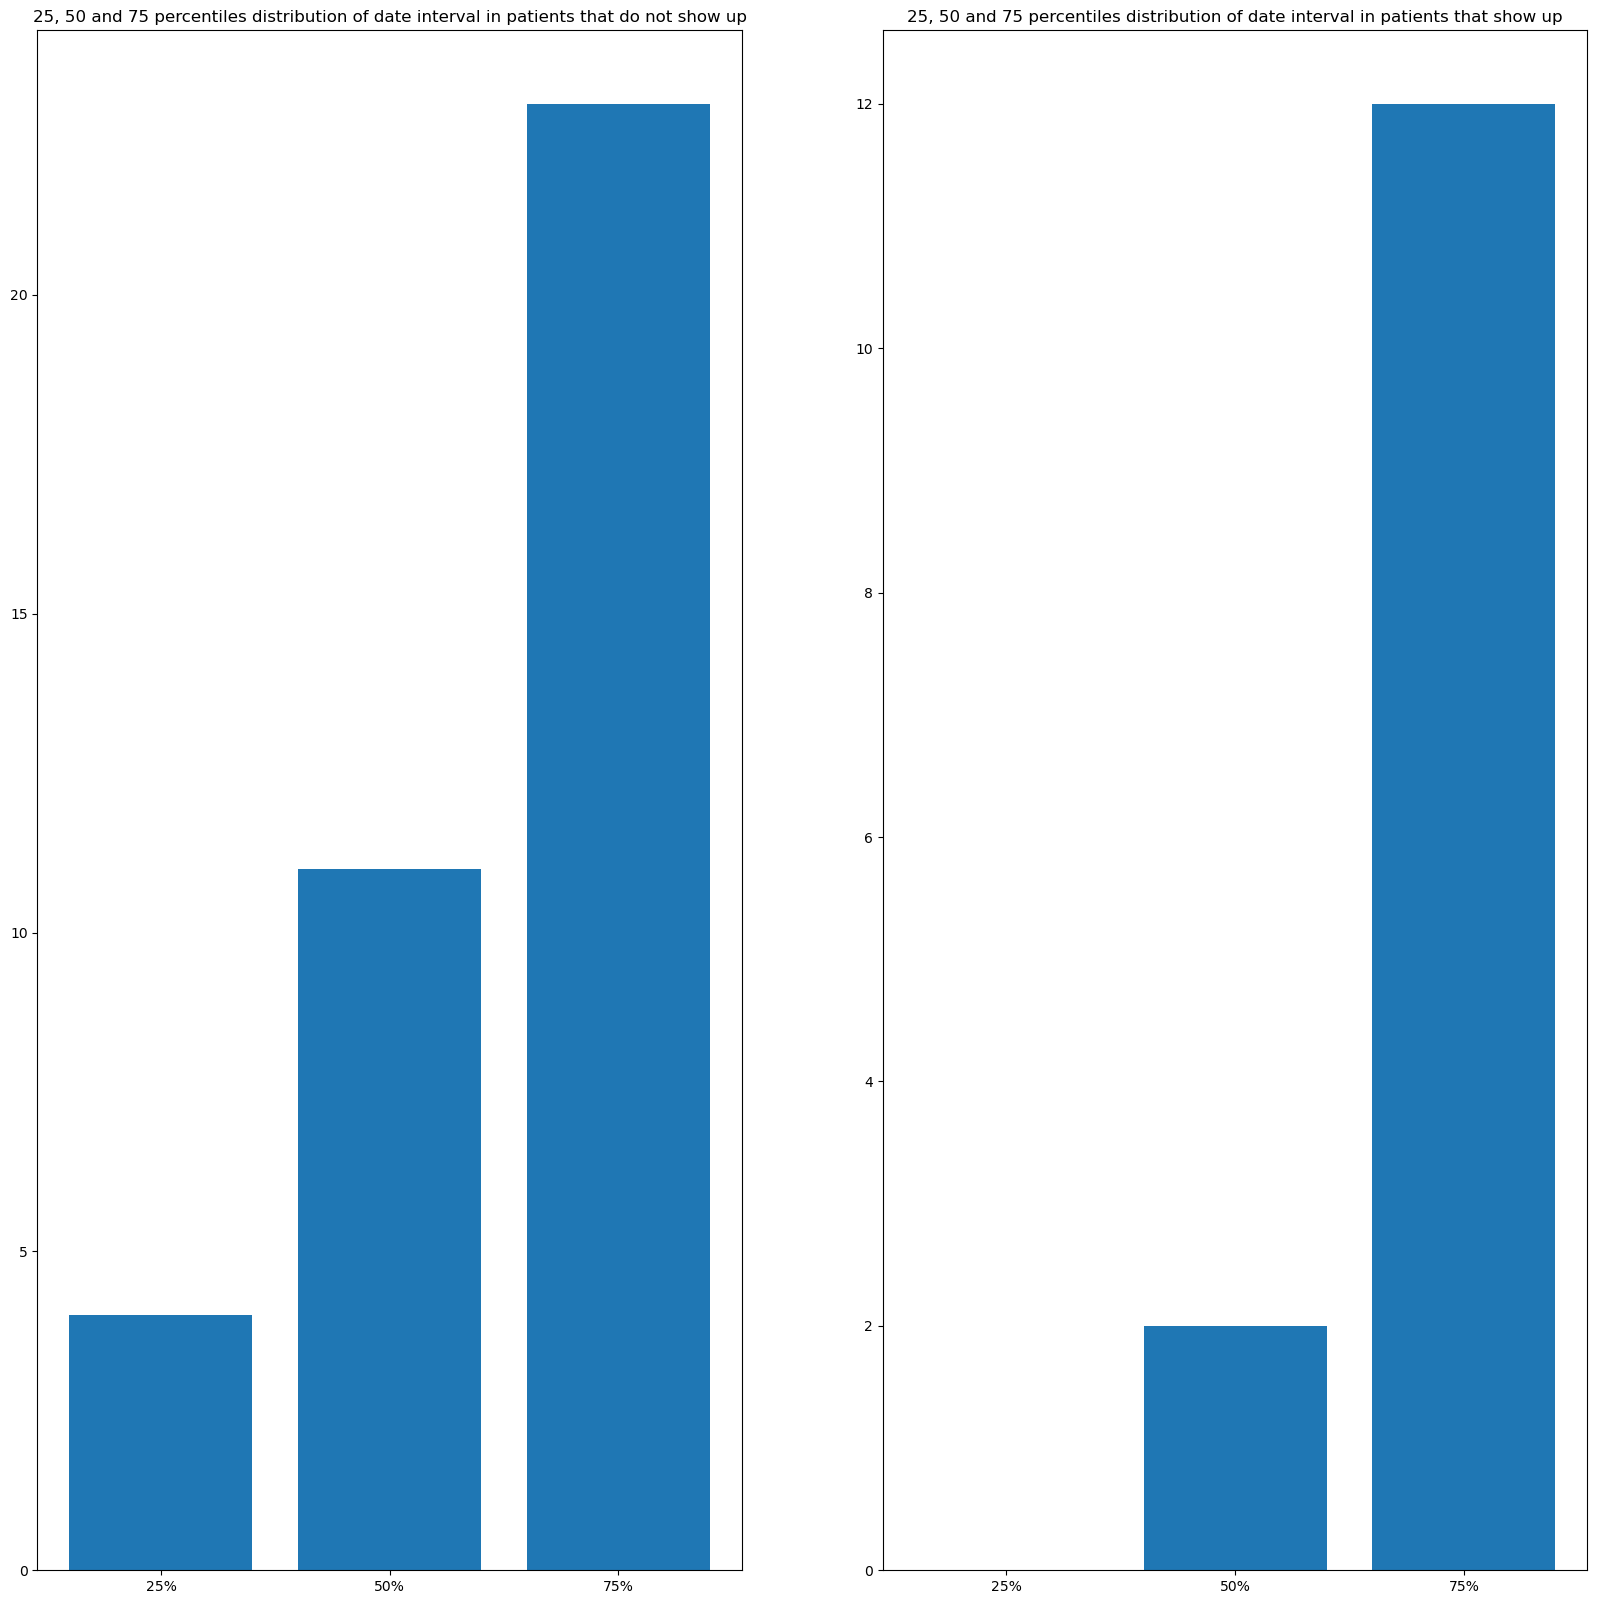

In [118]:
figure, axis = plt.subplots(1, 2, figsize=(20,20))
#plot a bar graph to show the percentiles distribution of the date interval in patients that did not show up
axis[0].bar(x=['25%','50%','75%'],height=df_absent.describe().iloc[4:7,9]);
axis[0].set_title('25, 50 and 75 percentiles distribution of date interval in patients that did not show up');
#plot a bar graph to show the percentiles distribution of the date interval in patients that showed up
axis[1].bar(x=['25%','50%','75%'],height=df_present.describe().iloc[4:7,9]);
axis[1].set_title('25, 50 and 75 percentiles distribution of date interval in patients that showed up');

In the plots above, we can see we have longer day interval from patients scheduled date to appointment date in patients that missed their appointments

In [88]:
df_present.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,interval
count,8.820800e+04,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.754659
std,2.563747e+14,6.931225e+04,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,14.550398
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176184e+13,5.685684e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,9.433715e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [89]:
df_absent.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,interval
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15.831489
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,16.605912
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [90]:
df_absent.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment,interval
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,yes,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,yes,2
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,yes,3
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,yes,1
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,yes,2


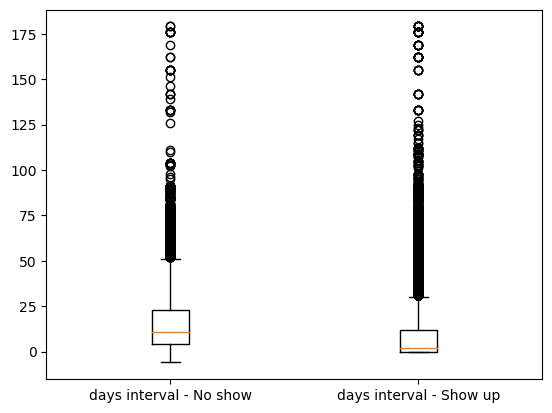

<Figure size 1800x1800 with 0 Axes>

In [120]:
#create box plot
plt.boxplot(x=[df_absent['interval'],df_present['interval']],labels=['days interval - No show','days interval - Show up']);
plt.figure(figsize=(18,18));

In the boxplot above, we can conclude that patients that miss their appointments have longer interval from their scheduled date to appointment date compared to those that did not miss their appointment

### Which day(s) of the week does patient skip appointment most

In [100]:
#create a new column that store the day of the week in df_absent
df_absent['appointment_day_name']= pd.to_datetime(df_absent['appointment_day']).dt.day_name()
df_absent.head()

C:\Users\Naheem\AppData\Local\Temp\ipykernel_4816\2491879149.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_absent['appointment_day_name']= pd.to_datetime(df_absent['appointment_day']).dt.day_name()


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment,interval,appointment_day_name
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,yes,2,Friday
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,yes,2,Friday
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,yes,3,Friday
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,yes,1,Friday
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,yes,2,Friday


In [102]:
#create a new column that store the day of the week in df_present
df_present['appointment_day_name']= pd.to_datetime(df_present['appointment_day']).dt.day_name()
df_present.head()

C:\Users\Naheem\AppData\Local\Temp\ipykernel_4816\524962637.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_present['appointment_day_name']= pd.to_datetime(df_present['appointment_day']).dt.day_name()


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment,interval,appointment_day_name
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,no,0,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,no,0,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,no,0,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no,0,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,no,0,Friday


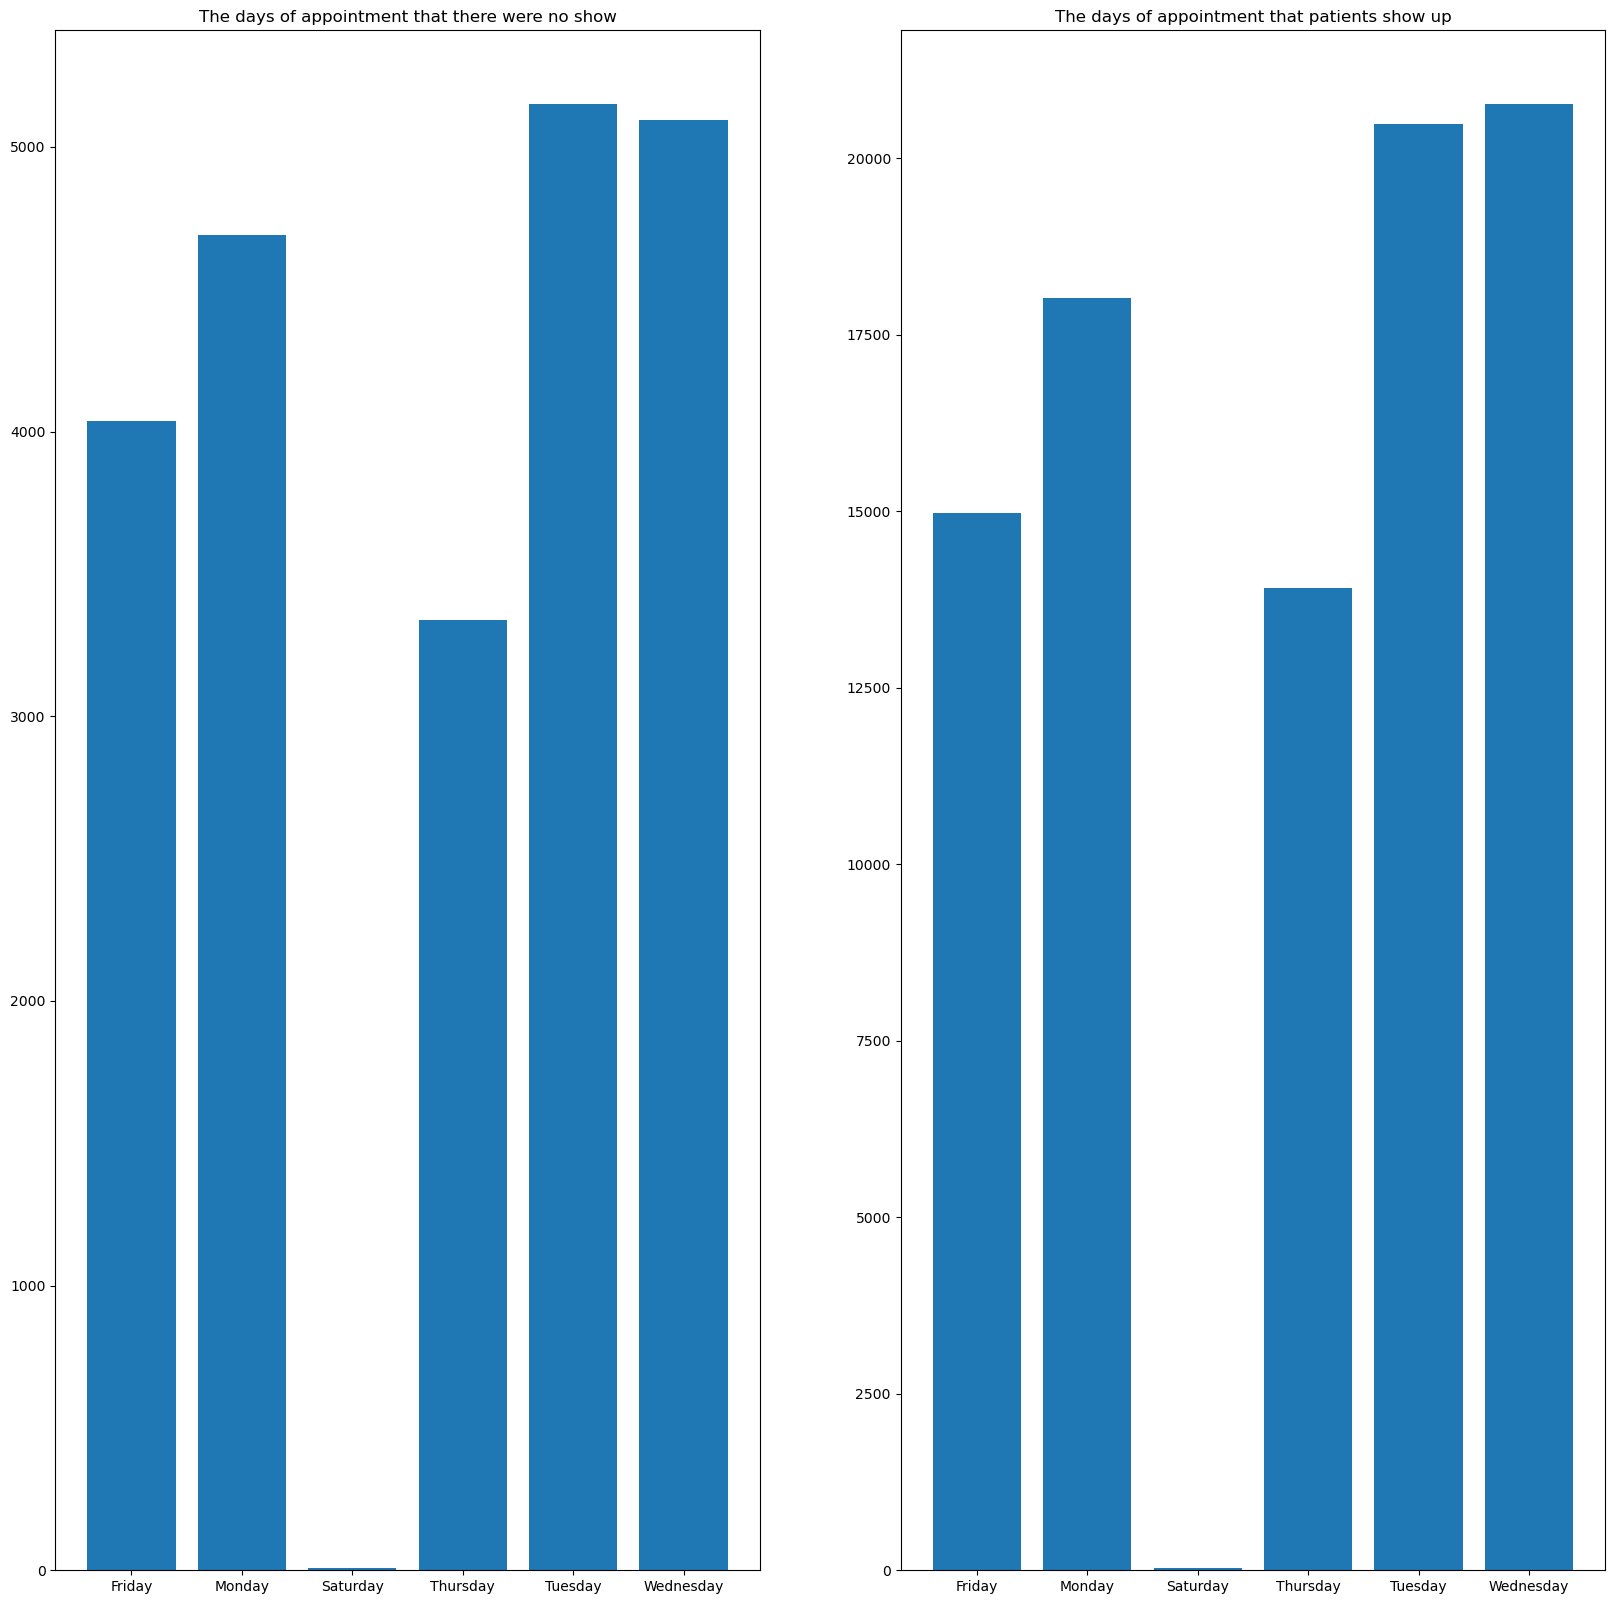

In [110]:
figure, axis = plt.subplots(1, 2, figsize=(20,20))
axis[0].bar(x=['Friday','Monday','Saturday','Thursday','Tuesday','Wednesday'],height=df_absent.groupby(by='appointment_day_name')['patient_id'].count());
axis[0].set_title('The days of appointment that there were no show');

axis[1].bar(x=['Friday','Monday','Saturday','Thursday','Tuesday','Wednesday'],height=df_present.groupby(by='appointment_day_name')['patient_id'].count());
axis[1].set_title('The days of appointment that patients show up');



The plots above show that patients that miss their appointments do so mostly when their appointment day is Thursday or Wednesday

<a id='conclusions'></a>
## Conclusions


### Factors that likely contribute to patients not able to show up for appointments

According to the analysis done, the following factors likely contribute to patients not able to show up for appointments:
* Patients that have hypertension - patients that miss their appointment are mostly hypertensive, which account for 60.4% of other health conditions that these patients have
* Patients that did not receive sms - 56% of the patients that did not show up did not receive sms
* Patients have no access to scholarship - 88% of the patients that missed appointment did not have access to scholarship

### Does the interval between scheduled date and appointment date likely to affect patients from showing up for appointments
The data analyzed shows that the longer the interval between patients' scheduled date and appointment date is, the likely patients won't show up for appointments as 75% of people that miss appointment have an interval of 23 days, why 75% of patients that show up have an interval of 12 days.

### Which day(s) of the week does patient skip appointment most
Patients that do not show up for appointments do so mostly on Tuesday, Wednesday and Monday

### Limitations
* The dataset has more people that show up for appointment, compared to those that do not, causing bias when comparing both together
* There is a need to know how the data was collected and the reason for the attributes(column name) used

### Additional Research
* Patient's house address is needed to further explore more information from the dataset
* The distance between the hospital and patient's home is needed to uncover more information

